# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings

In [4]:
warnings.filterwarnings("ignore")

In [5]:
# read in readmissions data provide

hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [6]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [7]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

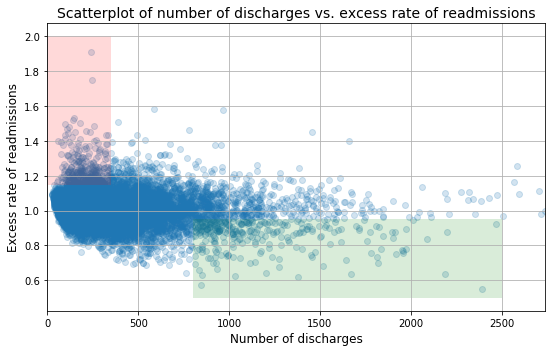

In [8]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Q1: Do you agree with the above analysis and recommendations? Why or why not?

No, I don't agree with the analysis made in the preliminary report majory because of the below reasons

+ The corelation between rate of readmissions and number of discharges has been concluded only based on the 
scatter plot and there was neither a numerical corelation measure calculated nor it's statistical significance checked.

+ The basis of choosing the red and the green area is not mentioned and it appears that it has been chosen arbitarily. Even when I visually check the scatter plot for the red area, I could see some sparse patches and similarly when i see the green area i could see some dense patches.

+ The difference between mean excess admission rate between the two groups i.e. one with discharges < 100 and the other with discharges > 1000 was not statistically tested to be significant.

+ In the conclusion a relation was suggested between hospital size and number of discharges without any evidence and hence this relation is unfounded and misleading.
+ Morover, a relation was also suggested between hospital size and lack of resources without any evidence andhence this relation is also unfounded and misleading.






<b> To make a sound statistical analysis let's first find out the underlying distribution of the two variables that are in question: "Number of Discharges" and "Excess Readmission Ratio" </b>

In [9]:
# Let us visually and statitically check the normality for both # of discharges and rate of admission
from scipy.stats import shapiro
from scipy.stats import normaltest

def check_normalp(data, column):
    
    
    sns.distplot(data[column].dropna())
    plt.xlabel(column)
    
    #data[column] = data[column].dropna()
    
    stat_shapiro, p_shapiro = shapiro(data[column].dropna())
    stat_k2, p_k2 = normaltest(data[column].dropna())

    meanp = (p_shapiro + p_k2)/2
    
    print('The p value for normality test for {} is {:0.5f}'.format(column,meanp))
    return meanp

def check_significance(p):
    
    if p < 0.01:
        print("Null hypothesis of normality can be rejected")
    else:
        print("Null hypothesis of normality can't be rejected")

The p value for normality test for Number of Discharges is 0.00000


C:\Users\barun\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


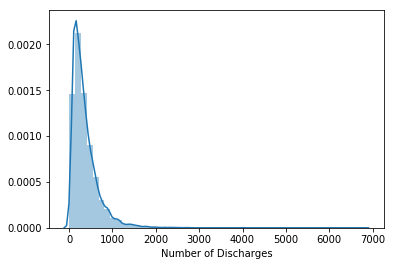

In [10]:
# Checking the p-value for normality test for Number of Discharges
pval_nod = check_normalp(clean_hospital_read_df, 'Number of Discharges')

In [11]:
check_significance(pval_nod)

Null hypothesis of normality can be rejected


The p value for normality test for Excess Readmission Ratio is 0.00000


C:\Users\barun\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


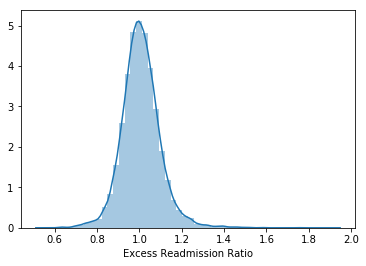

In [12]:
# Checking the p-value for normality test for Number of Discharges
pval_err = check_normalp(clean_hospital_read_df, 'Excess Readmission Ratio')

In [13]:
check_significance(pval_err)

Null hypothesis of normality can be rejected


### The normality test for variables show that both the variables are not normally distributed. 

Here I am interested in finding whether the corelation between number of discharges and excess readmission ratio is statistically significant. Now, as we know that the variables are not normally distributed, to do a hypothesis test on corelation of these two variables I will perform a permutation test.

In this test, to find out whether excess readmission rate has any significant corelation with number of discharges
we will calculate the pearson correlation of the permuted samples of number of discharges against a fixed sample of excess admission rate and will calculate the proportion of records that has proportion grater that the observed correlation.

In [14]:
# Function to calculate the pearson correlation coefficient of two variables
def pearson(x, y):
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]

In [15]:
clean_hospital_read_df = clean_hospital_read_df.dropna(subset = ['Excess Readmission Ratio'])

In [16]:
err = np.array(clean_hospital_read_df['Excess Readmission Ratio'])
nod = np.array(clean_hospital_read_df['Number of Discharges'])

In [17]:
len(err)
len(nod)

11497

In [19]:
obs_corr = pearson(err,nod)
print('observed correlation between excess readmission rate and number of discharges is \
{:0.5f}'.format (obs_corr))

observed correlation between excess readmission rate and number of discharges is -0.09740


<b> Null Hypothesis(H0) : There is no correlation between number of discharges and excess readmission ratio.

Alternate Hypothesis(H1) : There is correlation between number of discharges and excess readmission ratio and is equal to the observed correlation between the two groups. </b>

In [20]:
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    nod_permuted = np.random.permutation(nod)

    # Compute Pearson correlation
    perm_replicates[i] = pearson(nod_permuted,err)

# Compute p-value: p
p = np.sum(perm_replicates <= obs_corr) / len(perm_replicates)
print('p-val = {:0.5f}'.format(p))

p-val = 0.00000


### Conclusion:
The p-value is almost 0 suggesting that even at a significance level of alpha = .01 the null hypothesis that <b> there is no correlation between the number of discharges and excess readmission ratio </b> can be rejected.


<b> The Preliminary report also suggests that there exists a difference in means of excess admission ratio
between 2 groups, one with number of discharges < 100 (EAR = 1.023) and the other one 
with number of discharges > 1000 (EAR = 0.978). This is also saying in different words that there exists a correlation between number of discharges and excess readmission ratio</b> 
    
Again, this suggestion was made without any stastical tests, so let's perform a statistical test here to check the same.We have already seen that the distribution of excess readmission ratio is not normal, but as we are talking about means of two groups here and as the group sizes are substantial we can try a normal z-test or t-test for two means as the frequentist approach and also the bootstrap approach.

In [ ]:
#Function for drawing boot strap replicates
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates for function."""
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
    
    return bs_replicates


In [23]:
hosp_small = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]

In [24]:
hosp_large = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]

In [30]:
from statsmodels.stats.weightstats import ztest
ztest(hosp_large['Excess Readmission Ratio'], hosp_small['Excess Readmission Ratio'])

(-10.060620398500793, 8.247694433231281e-24)

In [32]:
from scipy.stats import ttest_ind
t_stat, p_val_t = ttest_ind(hosp_large['Excess Readmission Ratio'], hosp_small['Excess Readmission Ratio'])
print('tstat: {} p-value: {}'. format(t_stat,p_val_t))

tstat: -10.060620398500793 p-value: 3.778753923341558e-23


## Bootstrap Approach

In [56]:
hosp_combined = pd.concat([hosp_large, hosp_small],axis = 0).reset_index()
mean_combined = hosp_combined['Excess Readmission Ratio'].mean()

In [57]:
mean_combined

1.0101998182919458

In [58]:
obs_diff = hosp_small['Excess Readmission Ratio'].mean() - hosp_large['Excess Readmission Ratio'].mean()

In [59]:
obs_diff

0.04428292900204345

In [60]:
hosp_small_shifted = hosp_small['Excess Readmission Ratio'] - hosp_small['Excess Readmission Ratio'].mean() + mean_combined
hosp_large_shifted = hosp_large['Excess Readmission Ratio'] - hosp_large['Excess Readmission Ratio'].mean() + mean_combined

In [61]:
print(hosp_small_shifted.mean())
print(hosp_large_shifted.mean())

1.0101998182919465
1.010199818291945


In [62]:
bs_replicates_hosp_small = draw_bs_reps(hosp_small_shifted, np.mean, 10000)
bs_replicates_hosp_large = draw_bs_reps(hosp_large_shifted, np.mean, 10000)

In [63]:
bs_replicates_diff = bs_replicates_hosp_small - bs_replicates_hosp_large
bs_replicates_diff .mean()

5.1894541054919605e-05

In [64]:
p = np.sum(bs_replicates_diff >= obs_diff) / len(bs_replicates_diff)

In [65]:
print('bootstrap p-value : {:0.5f}'.format(p))

bootstrap p-value : 0.00000



### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client? 

### Conclusion:


<b> Statistical significance : </b>

The result of all the three tests gives a p-value of almost zero, suggesting that the null hypothesis that the mean of the two groups are same can be rejected. In other words, The difference of mean of excess admission ratio
is not same in hospitals with less than 100 discharges and hospitals more than 1000 discharge. The excess admission ratio in the hospitals less than 100 discharges is a little higher.

Testing both the hypothesis suggests the same thing that there is a statistically significant correlation between number of discharges and excess readmission ratio. 


<b> Practical significance: </b>

We have already seen that as per the statistical significance is concerned there exists a negative correlation between the number of discharges and the excess admission ratio, but practically speaking the value is very low
-0.097, which is very close to 0.

Practical significance is not the presence or absence of an effect (in this case, the correlation), but about the size or value of the effect, which in our case is extremely low.

In conclusion, althought there exists a negative correlation between the number of discharges and the excess readmission ratio, the value of the correlation is practically not significant. Hence we can say that the number
of discharges is not a great indicator of excess readmission ratio.

<b> Moreover, It certainly changes my recommendation to the client which was based on the assumption that there is a strong negative correlation between number of discharges and excess readmission ratio. As you have now concluded that number of discharges is not a good indicator of excess readmission ratio, we shall explore other features to
find out a strong correlation between the feature and excess readmission ratio. </b>


<b> Look at the scatterplot above. </b>

<b> What are the advantages and disadvantages of using this plot to convey information? </b>
 
 The scatter plot is a good tool to spot and explain a trend or a relation between two variables, but it should be accompanied with statistical results to find out whether a relation is significant.
 
 In this particular plot
 
<b> Advantages:</b>
 
 + Visually appealig and easy to understand
 + Gives an overview of a possible relation between the two variables 
 
<b>Disadvantages:</b>
 
 + Doesn't show any numerical measure of the relation and wheteher it is statistically significant.
 + Doesn't include a line suggesting a over all direction on the relation between the two variables.
 + Doesn't give an idea of the distribution od individual variables.

<b> Construct another plot that conveys the same information in a more direct manner. </b>

To address the disadvantages mentioned about the previous plot, I have contructed the below plot.

In [70]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr
hos = clean_hospital_read_df
discharges = hos[hos['Number of Discharges'] > 0]['Number of Discharges']
readmission = hos[hos['Number of Discharges'] > 0]['Excess Readmission Ratio']

In [ ]:
pearson, p = pearsonr(discharges, readmission)

C:\Users\barun\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


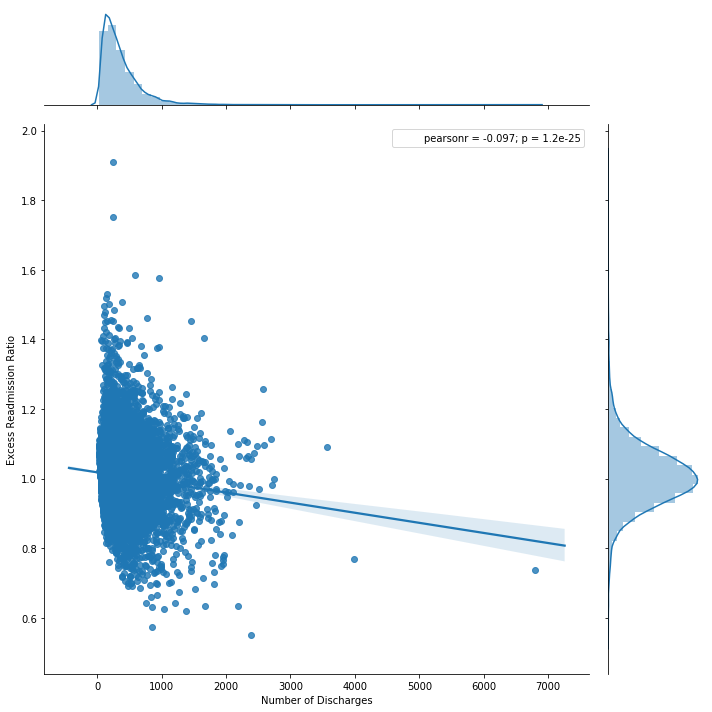

In [75]:
plot = sns.jointplot(discharges, readmission, kind='reg', height = 10)
plot.annotate(pearsonr)